In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import os
import re
import numpy as np
import pandas as pd
import nltk
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [75]:
# Getting path of folder stories and folders inside it

getPath = str('/content/drive/MyDrive/stories')
print(getPath)
getAllFolders = [x[0] for x in os.walk(getPath)]

getAllFolders.pop(len(getAllFolders)-1)
print(getAllFolders)

/content/drive/MyDrive/stories
['/content/drive/MyDrive/stories', '/content/drive/MyDrive/stories/SRE', '/content/drive/MyDrive/stories/FARNON']


In [76]:
#After analysing we found index.html that contains all the file names and titles
# create a tuple of all files path and title

list_of_all_files = []
flag = 0
for i in getAllFolders:
    path = i+"/index.html"
    print(path)
    openIndexFile = open(path, 'r')
    getContent = openIndexFile.read().strip()
    openIndexFile.close()
    
    # file name is enclosed in Anchor tag of html file
    getFileName = re.findall('><A HREF="(.*)">', getContent)
    #print(getFileName)
    
    # file title is enclosed in <BR><TD> tag of html file
    getFileTitle = re.findall('<BR><TD> (.*)\n', getContent)
    #print(len(getFileTitle))
    
    #for excluding folder inside stories which are at 0th and 1st index
    if flag==0:
        getFileName = getFileName[2:]
        flag = 1
    for j in range(len(getFileName)):
        list_of_all_files.append((str(i)+"/" + str(getFileName[j]), getFileTitle[j]))
    
#print(len(list_of_all_files))

/content/drive/MyDrive/stories/index.html
/content/drive/MyDrive/stories/SRE/index.html
/content/drive/MyDrive/stories/FARNON/index.html


In [77]:
#Convert data in to lower case
def lower(text):
    return np.char.lower(text)

# remove all the stopwords(‘off’, ‘is’, ‘s’, ‘am’, ‘or’, ‘who’, e.t.c) from data
def stopWords(text):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(text))
    new_text = ""
    for w in words:
        if w not in stop_words:
            new_text = new_text + " " + w
    return np.char.strip(new_text)

# remove all the punctuation symbols
def punctuationSymbols(text):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        text = np.char.replace(text, symbols[i], ' ')
        text = np.char.replace(text, "  ", " ")
        text = np.char.replace(text, ',', '')
    return text

# remove all apostrophes  
def unUsed(text):
    return np.char.replace(text, "'", "")

def deleteNumerics(text):
    text = np.char.replace(text, "0", " zero ")
    text = np.char.replace(text, "1", " one ")
    text = np.char.replace(text, "2", " two ")
    text = np.char.replace(text, "3", " three ")
    text = np.char.replace(text, "4", " four ")
    text = np.char.replace(text, "5", " five ")
    text = np.char.replace(text, "6", " six ")
    text = np.char.replace(text, "7", " seven ")
    text = np.char.replace(text, "8", " eight ")
    text = np.char.replace(text, "9", " nine ")
    return text


In [78]:
#call all the above functions to preprocess the data
def preprocess(data,query):    
    data = lower(data)
    data = stopWords(data)
    data = punctuationSymbols(data) #remove comma seperately
    data = deleteNumerics(data)
    # data = blankSpaces(data)
    return data





In [79]:
num = 0
words = {}
list_len_doc={}
listsOfDocs = pd.DataFrame()
max_freq={}
for i in list_of_all_files:
  list_len_doc[i[0][31:]]=len(i[1])
  # print(list_len_doc)
    #for reading files with all the extensions including .txt
  with open(i[0], 'r', encoding = 'utf-8', errors = 'ignore') as f2:
    text = f2.read().strip()
    f2.close()
    #call preprocess for each file
    preprocessed_text = preprocess(text,False)
    preprocessed_text = str(preprocessed_text)
    #tokenisation
    tokens = preprocessed_text.split()
    for j in tokens:
      file=i[0][31:]
      if file not in max_freq.keys():
        max_freq[file]={j:1}
      elif j not in max_freq[file].keys():
       max_freq[file].update({j:1})
      else:
        for key,val in max_freq[file].items():
          if key==j:
            count=val+1
            max_freq[file].update({j:count})
      # print(max_freq)
      # print(len(tokens))
    # print(len(set(tokens)))
    for j in tokens:
      if j not in words:
        dic ={}
        ls = []
        for k in range(len(tokens)):
          if j == tokens[k]:
            ls.append(k)
        dic[i[0][31:]] = [len(ls),ls]
        words[j] = [len(dic),[dic]]
      else:
        word_list = words[j][1]
        words_dic = word_list[0]
        if (i[0][31:] not in words_dic):
          doc_list = word_list[0]
          ls = []
          for k in range(len(tokens)):
            if j == tokens[k]:
              ls.append(k)
          words_dic[i[0][31:]] = [len(ls),ls]
          word_list[0] = words_dic
          words[j][1] = word_list
          words[j][0] += 1 
  # print(num)
  num+=1

In [80]:
print(words['shareware'])

[5, [{'100west.txt': [1, [0]], 'arctic.txt': [1, [0]], 'breaks1.asc': [1, [6]], 'breaks3.asc': [1, [10200]], 'cybersla.txt': [2, [11, 15]]}]]


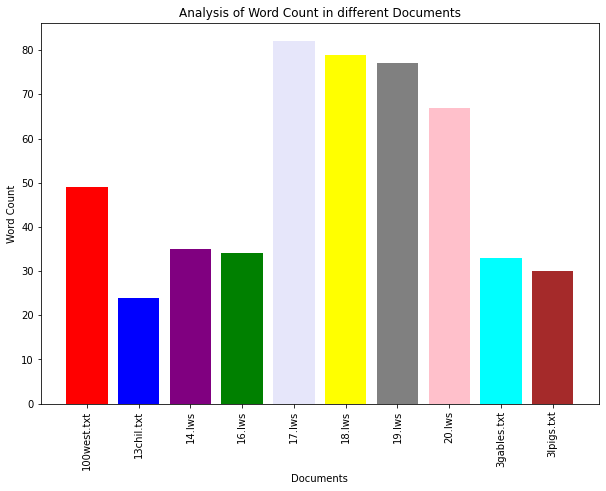

In [84]:
list_docs=pd.DataFrame(list_len_doc,index=range(1)).T

#list_docs=list_docs.reset_index
list_docs['Docs']=list_docs.index
list_docs.index=range(467)
list_docs
word_count_file = list_docs[0].head(10)
file_name = list_docs['Docs'].head(10)
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(file_name,word_count_file,color=['red', 'blue', 'purple', 'green', 'lavender','yellow','grey','pink','cyan','brown'])
plt.xticks(rotation=90)
# Show Plot
plt.xlabel("Documents")
plt.ylabel("Word Count")
plt.title("Analysis of Word Count in different Documents")
plt.show()

# **Jaccard Coefficient**

Q2. i) Calculating Jaccard Coefficient

In [85]:
jaccard_list=[]
def jaccard_calc(doc,query,file_name):
  ls=[]
  ls.append(file_name)
  ## intersection of doc1  and query1
  doc1=set(doc.split())
  query1=set(query.split())


  intersection_of_doc_and_query=doc1.intersection(query1)
  union_of_doc_and_query=doc1.union(query1)
  ls.append(float(len(intersection_of_doc_and_query)/len(union_of_doc_and_query)))
  jaccard_list.append(ls)

In [86]:
query_input = input("Enter your query: ")
for i in list_of_all_files:
    #for reading files with all the extensions including .txt
  with open(i[0], 'r', encoding = 'utf-8', errors = 'ignore') as f2:
    text = f2.read().strip()
    f2.close()
    #call preprocess for each file
    preprocessed_text = preprocess(text,False)
    preprocessed_text = str(preprocessed_text)
    preprocessed_query = preprocess(query_input,False)
    preprocessed_query = str(preprocessed_query)

    Q = jaccard_calc(preprocessed_text,preprocessed_query,i[0][31:])
   # print(i[0][31:])

#   ## intersection of doc1  and query1
# print(jaccard_list)

Enter your query: lion look pave road


In [87]:
jaccard_list = sorted(jaccard_list,key=lambda x: (x[1]),reverse=True)
flag=0
for i in range(5):
  if jaccard_list[i][1]!=0:
    file_name=jaccard_list[i][0]
    flag=1
    print(file_name)
if flag==0:
  print("Cannot calculate jaccard coefficient")

rid.txt
monkking.txt
redragon.txt
quarter.c15
narciss.txt


# **TF-IDF**

Q2. ii). Calculating TF-IDF

In [88]:
#calculating TF-IDF
tf_idf_matrix={}
for key,value in words.items():
  l=value
  # print(l)
  d=l[1][0]
  tf_idf={}
  for keys,val in d.items():
    tf=val[0]/list_len_doc[keys]
    idf=np.log(len(list_len_doc)/(l[0]+1))
    tf_idf[keys]=tf*idf
  tf_idf_matrix[key]=tf_idf
tf_idf_matrix
# def cal_tfidf(word):
#   l=words[word]
#   d=l[1][0]
#   tf_idf={}
#   for keys,val in d.items():
#     tf=val[0]/list_len_doc[keys]
#     idf=np.log(len(list_len_doc)/(l[0]+1))
#     tf_idf[keys]=tf*idf
#   return tf_idf

{'shareware': {'100west.txt': 0.08886877119267024,
  'arctic.txt': 0.08374172670078543,
  'breaks1.asc': 0.047332280309139586,
  'breaks3.asc': 0.047332280309139586,
  'cybersla.txt': 0.1501575789117532},
 'trial': {'100west.txt': 0.05602309951034167,
  'aesop11.txt': 0.10980527504026968,
  'archive': 0.07419275340558763,
  'arctic.txt': 0.05279099761551427,
  'beggars.txt': 0.44515652043352577,
  'blabnove.hum': 0.08073917282372771,
  'blabnove.txt': 0.06238936081833505,
  'blackp.txt': 0.19608084828619585,
  'bookem.1': 0.11438049483361425,
  'breaks2.asc': 0.059676779913190044,
  'buldetal.txt': 0.0915043958668914,
  'bureau.txt': 0.16637162884889345,
  'burintrv.92': 0.02287609896672285,
  'crazy.hum': 0.24221751847118314,
  'deal': 0.09804042414309792,
  'dskool.txt': 0.11935355982638009,
  'empty.txt': 0.17157074225042138,
  'fred.txt': 0.15250732644481899,
  'gulliver.txt': 0.4270205140454932,
  'hitch2.txt': 0.03431414845008428,
  'hitch3.txt': 0.14448062505298642,
  'hound-b.t

**Calculating Top 5 documents based on TF-IDF score**

In [ ]:
# docs={}
# k=[]
# for i in qls:
#   doc_list=tf_idf_matrix[i]
#   for key,value in doc_list.items():
#       if key not in docs.keys():
#         docs[key]=value
#       else:
#         docs[key]+=value
# for key,value in docs.items():
#   k.append(value)
# k.sort(reverse=True)
# # print(k,docs)
# c=0
# top5_docs=[]
# for i in k[:5]:
#   for key,value in docs.items():
#     if value==i:
#       top5_docs.append(key)

# top5_docs

In [89]:
def top5(doclist):
  k=[]
  a=[]
  for key,value in doclist.items():
    k.append(value)
  k.sort(reverse=True)
  for i in k[:5]:
    for key,value in doclist.items():
      if value==i and key not in a:
        a.append(key)
        break
  return a  

**Calculating the Term frequency based on different weighting schemes**

In [90]:
#Binary weighting scheme
def binary_tf(qls):
  tf_list={}
  for word in qls:
    l=words[word]
    d=l[1][0]
    tf_idf={}
    for keys,val in d.items():
      tf=1
      idf=np.log(len(list_len_doc)/(l[0]+1))
      tf_idf[keys]=tf*idf
      # print(tf_idf)
    tf_list[word]=tf_idf
  doclist={}

  for i in qls:
    doc_list=tf_list[i]
    for key,value in doc_list.items():
        if key not in doclist.keys():
          doclist[key]=value
        else:
          doclist[key]+=value
  print("Binary weight scheme- \n",top5(doclist))
  return tf_list


In [91]:
#Raw count
def raw_tf(qls):
  tf_list={}
  for word in qls:
    l=words[word]
    d=l[1][0]
    tf_idf={}
    for keys,val in d.items():
      tf=val[0]
      idf=np.log(len(list_len_doc)/(l[0]+1))
      tf_idf[keys]=tf*idf
      # print(tf_idf)
    tf_list[word]=tf_idf
  doclist={}

  for i in qls:
    doc_list=tf_list[i]
    for key,value in doc_list.items():
        if key not in doclist.keys():
          doclist[key]=value
        else:
          doclist[key]+=value
  print("Raw count weight scheme- \n",top5(doclist))
  return tf_list


In [92]:
#term frequency
def tf_norm(word):
  tf_list={}
  for word in qls:
    l=words[word]
    d=l[1][0]
    tf_idf={}
    for keys,val in d.items():
      tf=val[0]/list_len_doc[keys]
      idf=np.log(len(list_len_doc)/(l[0]+1))
      tf_idf[keys]=tf*idf
      # print(tf_idf)
    tf_list[word]=tf_idf
  doclist={}

  for i in qls:
    doc_list=tf_list[i]
    for key,value in doc_list.items():
        if key not in doclist.keys():
          doclist[key]=value
        else:
          doclist[key]+=value

  print("Term Frequency weight scheme- \n",top5(doclist))
  return tf_list

In [93]:
#log normalisation
import math
def logn_tf(qls):
  tf_list={}
  for word in qls:
    l=words[word]
    d=l[1][0]
    tf_idf={}
    for keys,val in d.items():
      tf=math.log(1+val[0])
      idf=np.log(len(list_len_doc)/(l[0]+1))
      tf_idf[keys]=tf*idf
      # print(tf_idf)
    tf_list[word]=tf_idf
  doclist={}

  for i in qls:
    doc_list=tf_list[i]
    for key,value in doc_list.items():
        if key not in doclist.keys():
          doclist[key]=value
        else:
          doclist[key]+=value
  print("Log normlization weight scheme- \n",top5(doclist))  
  return tf_list


In [94]:
# Calculating max occurence of word in each doc
doc_max_word={}
for key,value in max_freq.items():
  doc_max_word[key]=max([i for i in max_freq[key].values()]) 
doc_max_word

{'100west.txt': 27,
 '13chil.txt': 38,
 '14.lws': 17,
 '16.lws': 72,
 '17.lws': 47,
 '18.lws': 185,
 '19.lws': 73,
 '20.lws': 64,
 '3gables.txt': 222,
 '3lpigs.txt': 22,
 '3sonnets.vrs': 11,
 '3student.txt': 198,
 '3wishes.txt': 23,
 '4moons.txt': 61,
 '5orange.txt': 160,
 '6ablemen.txt': 18,
 '6napolen.txt': 141,
 '7oldsamr.txt': 12,
 '7voysinb.txt': 82,
 'SRE/sre01.txt': 38,
 'SRE/sre02.txt': 26,
 'SRE/sre03.txt': 23,
 'SRE/sre04.txt': 107,
 'SRE/sre05.txt': 40,
 'SRE/sre06.txt': 46,
 'SRE/sre07.txt': 72,
 'SRE/sre08.txt': 76,
 'SRE/sre09.txt': 95,
 'SRE/sre10.txt': 151,
 'SRE/sre_feqh.txt': 87,
 'SRE/sre_finl.txt': 99,
 'SRE/sre_sei.txt': 90,
 'SRE/sretrade.txt': 22,
 'SRE/srex.txt': 169,
 'ab40thv.txt': 34,
 'abbey.txt': 153,
 'abyss.txt': 18,
 'adler.txt': 34,
 'adv_alad.txt': 44,
 'advsayed.txt': 60,
 'advtthum.txt': 16,
 'aesop11.txt': 458,
 'aesopa10.txt': 319,
 'aircon.txt': 3,
 'aisle.six': 12,
 'aislesix.txt': 12,
 'alad10.txt': 104,
 'alissadl.txt': 12,
 'altside.hum': 185,

In [96]:
#double normalisation
def double_tf(qls):
  tf_list={}
  for word in qls:
    l=words[word]
    d=l[1][0]
    tf_idf={}
    for keys,val in d.items():
      tf=0.5+0.5*(val[0]/doc_max_word[keys])
      idf=np.log(len(list_len_doc)/(l[0]+1))
      tf_idf[keys]=tf*idf
      # print(tf_idf)
    tf_list[word]=tf_idf
  doclist={}

  for i in qls:
    doc_list=tf_list[i]
    for key,value in doc_list.items():
        if key not in doclist.keys():
          doclist[key]=value
        else:
          doclist[key]+=value
  
  print("Double Normalization weight scheme- \n",top5(doclist)) 
  return tf_list

Enter query : lion look pave road


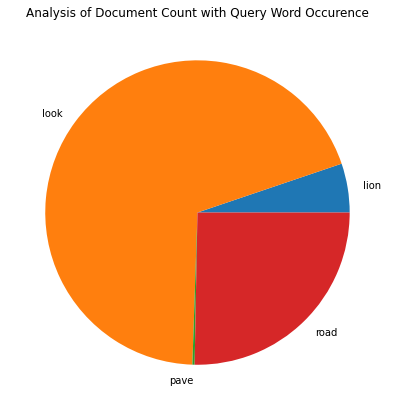

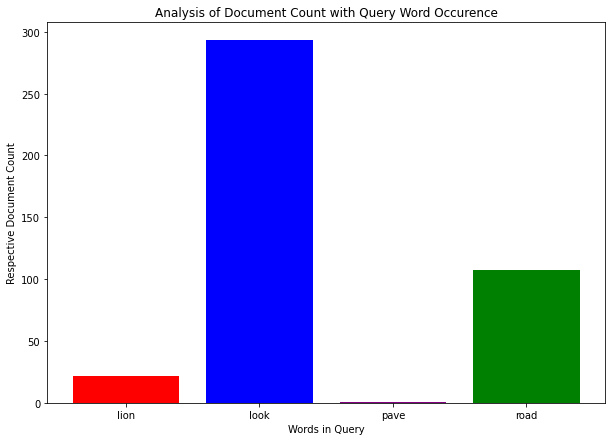

In [111]:
import matplotlib.pyplot as plt
query = input("Enter query : ")
query = preprocess(query,False)
query=query.tolist()
#tokenisation
flag=0
qls = query.split()
for i in qls:
  if i not in words.keys():
    print("Cannot process this query")
    flag=1
    break
if flag==0:
  word=[]
  count=[]
  for i in qls:
    q=words[i]
    word.append(i)
    count.append(q[0])
  fig = plt.figure(figsize =(10, 7))  
#  plt.bar(word,count,color=['red', 'blue', 'purple', 'green'])
##### Pie Chart
  plt.pie(count, labels = word)
#  plt.xlabel("Words in Query")
#  plt.ylabel("Respective Document Count")
  plt.title("Analysis of Document Count with Query Word Occurence")
  plt.show()
  ##### Bar Graph
  fig = plt.figure(figsize =(10, 7)) 
  plt.bar(word,count,color=['red', 'blue', 'purple', 'green'])
  #  plt.pie(count, labels = word)

  plt.xlabel("Words in Query")
  plt.ylabel("Respective Document Count")
  plt.title("Analysis of Document Count with Query Word Occurence")
  plt.show()

In [112]:
if flag==0:
  print("*******Top 5 documents based on TF-IDF score for-*********")
  bin_list=binary_tf(qls)
  raw_list=raw_tf(qls)
  tef_list=tf_norm(qls)
  log_list=logn_tf(qls)
  double_list=double_tf(qls)
else:
  print("Cannot calculate TF-IDF score")

*******Top 5 documents based on TF-IDF score for-*********
Binary weight scheme- 
 ['perf', 'aesop11.txt', 'aesopa10.txt', 'archive', 'fgoose.txt']
Raw count weight scheme- 
 ['aesop11.txt', 'aesopa10.txt', 'cybersla.txt', 'radar_ra.txt', 'history5.txt']
Term Frequency weight scheme- 
 ['aesop11.txt', 'aesopa10.txt', 'history5.txt', 'vgilante.txt', 'cybersla.txt']
Log normlization weight scheme- 
 ['aesop11.txt', 'aesopa10.txt', 'veiledl.txt', 'cybersla.txt', 'lionmane.txt']
Double Normalization weight scheme- 
 ['perf', 'lionmosq.txt', 'lionwar.txt', 'aesop11.txt', 'aesopa10.txt']


# **Cosine Similiarity**

Q2. iii) Calculating Cosine Similarity

In [113]:
from sklearn.metrics.pairwise import cosine_similarity

In [114]:
def cosine_relevant_docs(qls,tf_idf_matrix):
  query_doc = []
  total_docs = []
  for i in qls:
    for k,v in tf_idf_matrix.items():    #checking documents containing words/tokens in the given query based on their total vocabulary
      #print([k,v])
      if (k == i):
        query_doc.append([k,v])
        for kk,vv in v.items():
          total_docs.append(kk)
  np.array(query_doc).reshape(-1)
  #print(total_docs)
  tot_docs = np.array(pd.Series(total_docs).unique())         #checking unique documents with words from the query
  vector={}
  for i in qls:
    d=tf_idf_matrix[i]
    for j in tot_docs:
      if j in d.keys() and i not in vector.keys():              #retrieving tf-idf values for the docs 
        vector[i]=[d[j]]                                        #creating document vectors from the query
      elif j in d.keys():
        k=vector[i]
        k.append(d[j])
        vector[i]=k
      else:
        if j not in d.keys() and i not in vector.keys():
          vector[i]=[0]
        elif j not in d.keys():
          k=vector[i]
          k.append(0)
          vector[i]=k    

  df=pd.DataFrame(vector)
  df['Doc'] = tot_docs                                        #appending docs name for all the docs based on the query
  newdf = df.drop('Doc', axis=1)
  newdf
  cossim = pd.DataFrame(cosine_similarity(newdf),index=newdf.index, columns = newdf.index)          #finding cosine similarity of all the documents vectors created with each other
  sim = cossim[(cossim > 0.99) & (cossim < 1)].fillna(0)
  ress = np.array(sim[1])
  out_tpl = np.nonzero(ress)
  #out_tpl
  idx = (-ress).argsort()[:5]                         #finding top 5 relevant documents according to cosine similarity of document vectors
  reldocs = np.array(df['Doc'])
  top5cosine = []
  for i in idx:
    #print(reldocs[i])
    top5cosine.append(reldocs[i])
  print(top5cosine)

In [115]:
  #cosine_relevant_docs(qls,tf_idf_matrix)
if flag==0:  
    print(" *** Top 5 relevant documents based on cosine similarity *** ")
    print("For Binary weight scheme")
    cosine_relevant_docs(qls,bin_list)
    print("For Raw Count weight scheme")
    cosine_relevant_docs(qls,raw_list)
    print("For Term Frequency weight scheme")
    cosine_relevant_docs(qls,tef_list)
    print("For Log Normalization weight scheme")
    cosine_relevant_docs(qls,log_list)
    print("For Double Normalization weight scheme")
    cosine_relevant_docs(qls,double_list)
else:
    print("Cannot calculate cosine similarity")

 *** Top 5 relevant documents based on cosine similarity *** 
For Binary weight scheme
['abbey.txt', 'oxfrog.txt', 'outcast.dos', 'non4', 'nitepeek.sto']
For Raw Count weight scheme
['aesopa10.txt', 'lionwar.txt', 'holmesbk.txt', 'korea.s', 'lionmosq.txt']
For Term Frequency weight scheme
['aesopa10.txt', 'lionwar.txt', 'holmesbk.txt', 'korea.s', 'lionmosq.txt']
For Log Normalization weight scheme
['aesop11.txt', 'aesopa10.txt', 'veiledl.txt', 'lionmane.txt', 'abbey.txt']
For Double Normalization weight scheme
['aesop11.txt', 'aesopa10.txt', 'veiledl.txt', 'lionmane.txt', 'silverb.txt']
